In [1]:
import lightgbm as lgb
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split

In [2]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

In [3]:
# load the whole size dataset
X = np.load("London/X_all.npy")
Y_NO2 = np.load("London/Y_NO2_all.npy")
Y_PM10 = np.load("London/Y_PM10_all.npy")
Y_PM25 = np.load("London/Y_PM25_all.npy")

In [4]:
# calculate the symmetric mean absolute percentage error (SMAPE)
def get_score(pred, valid_y_exp):
    return np.mean(np.abs(pred - valid_y_exp) / (pred + valid_y_exp) * 2)

In [5]:
# lightgbm model parameters
# model_param = {'lr': 0.02, 'depth': 10, 'tree': 3000, 'leaf': 400, 'sample': 0.9, 'seed': 3}

# model_param = {'lr': 0.1, 'depth': 10, 'tree': 300, 'leaf': 600, 'sample': 0.8, 'seed': 3}

# train and test the input X Y with the lightgbm model
def train_test(model_param, train_X, test_X, train_Y, test_Y, save_dir):
    time_start = time.time()
    lgb_train = lgb.Dataset(train_X, train_Y)
    lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)
    
    params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': {'l2', 'l1'},
    'max_depth': model_param['depth'],
    'num_leaves': model_param['leaf'],
    'min_data_in_leaf': 20,
    'learning_rate': model_param['lr'],
    'feature_fraction': 1,
    'bagging_fraction': model_param['sample'],
    'bagging_freq': 1,
    'bagging_seed': model_param['seed'],
#     'min_sum_hessian_in_leaf': 100,
    'verbose': 0
    }
    
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=model_param['tree'],
                    valid_sets=lgb_eval,
                    early_stopping_rounds=20)

    test_predict = gbm.predict(test_X)
    score = get_score(test_predict, test_Y)
    save_pkl(save_dir, gbm)
    print('running time: ', time.time() - time_start)
    return score

In [6]:
# PM 2.5

In [6]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(4325068, 198) (1081268, 198) (4325068,) (1081268,)


In [18]:
model_param = {'lr': 0.01, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}
score = train_test(model_param, train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25, "London/lightgbm_PM25_1.model")
print('score: ', score)

[1]	valid_0's l1: 7.52919	valid_0's l2: 125.754
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 7.46986	valid_0's l2: 123.668
[3]	valid_0's l1: 7.41103	valid_0's l2: 121.622
[4]	valid_0's l1: 7.353	valid_0's l2: 119.615
[5]	valid_0's l1: 7.29559	valid_0's l2: 117.649
[6]	valid_0's l1: 7.23885	valid_0's l2: 115.718
[7]	valid_0's l1: 7.18282	valid_0's l2: 113.827
[8]	valid_0's l1: 7.12736	valid_0's l2: 111.974
[9]	valid_0's l1: 7.07258	valid_0's l2: 110.155
[10]	valid_0's l1: 7.0184	valid_0's l2: 108.372
[11]	valid_0's l1: 6.96486	valid_0's l2: 106.624
[12]	valid_0's l1: 6.91192	valid_0's l2: 104.911
[13]	valid_0's l1: 6.8596	valid_0's l2: 103.226
[14]	valid_0's l1: 6.80789	valid_0's l2: 101.579
[15]	valid_0's l1: 6.75674	valid_0's l2: 99.9634
[16]	valid_0's l1: 6.7063	valid_0's l2: 98.3796
[17]	valid_0's l1: 6.65634	valid_0's l2: 96.8291
[18]	valid_0's l1: 6.607	valid_0's l2: 95.3053
[19]	valid_0's l1: 6.55829	valid_0's l2: 93.8123
[20]	valid_0's l1: 6.50

In [19]:
gbm = read_pkl("London/lightgbm_PM25_1.model")
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM25_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.34834325053068094

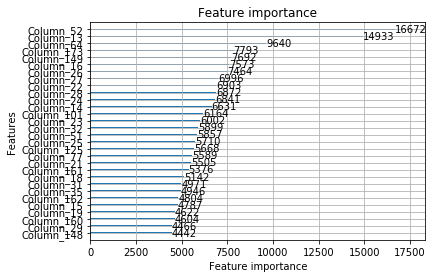

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [7]:
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}
score = train_test(model_param, train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25, "London/lightgbm_PM25.model")
print('score: ', score)

[1]	valid_0's l2: 126.817	valid_0's l1: 7.55923
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 125.761	valid_0's l1: 7.5294
[3]	valid_0's l2: 124.714	valid_0's l1: 7.49964
[4]	valid_0's l2: 123.678	valid_0's l1: 7.47007
[5]	valid_0's l2: 122.652	valid_0's l1: 7.44069
[6]	valid_0's l2: 121.635	valid_0's l1: 7.41151
[7]	valid_0's l2: 120.63	valid_0's l1: 7.38247
[8]	valid_0's l2: 119.635	valid_0's l1: 7.35363
[9]	valid_0's l2: 118.648	valid_0's l1: 7.3249
[10]	valid_0's l2: 117.671	valid_0's l1: 7.29633
[11]	valid_0's l2: 116.703	valid_0's l1: 7.26794
[12]	valid_0's l2: 115.745	valid_0's l1: 7.2397
[13]	valid_0's l2: 114.796	valid_0's l1: 7.21161
[14]	valid_0's l2: 113.857	valid_0's l1: 7.18369
[15]	valid_0's l2: 112.928	valid_0's l1: 7.156
[16]	valid_0's l2: 112.008	valid_0's l1: 7.12843
[17]	valid_0's l2: 111.095	valid_0's l1: 7.10102
[18]	valid_0's l2: 110.193	valid_0's l1: 7.07379
[19]	valid_0's l2: 109.299	valid_0's l1: 7.04672
[20]	valid_0's l2: 108

In [8]:
gbm = read_pkl("London/lightgbm_PM25.model")
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM25_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3360587832965872

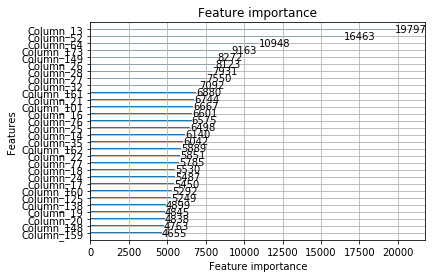

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()
'''
features = ['PM25_Concentration','PM10_Concentration','NO2_Concentration', # feature 0-2
            'temperature','pressure','humidity','wind_speed', 'wind_direction', # feature 3-7
            'holiday','time_month','time_week','time_day','time_hour','station_index', # feature 8-13
            
            'mean_PM25','mean_PM10','mean_NO2','mean_temperature','mean_pressure','mean_humidity','mean_wind_speed','mean_wind_direction', # feature 14-21
            'max_PM25','max_PM10','max_NO2','max_temperature','max_pressure','max_humidity','max_wind_speed', # feature 22-28
            'var_PM25','var_PM10','var_NO2','var_temperature','var_pressure','var_humidity','var_wind_speed','var_wind_speed', # feature 29-36
            'pressure_temperature','temperature_humidity','PM','PM25_10' # feature 37-40
            
            # feature 41-52: historical PM2.5 features
            # feature 53-64: historical PM10 features
            # feature 65-76: historical NO2 features
            # feature 77-100: historical temperature and forecasting features
            # feature 101-124: historical pressure and forecasting features
            # feature 125-148: historical humidity and forecasting features
            # feature 149-172: historical wind_speed and forecasting features
            # feature 173-196: historical wind_direction and forecasting features
            
            # feature 197: prediction id
            ]
'''

In [ ]:
# PM 10

In [6]:
# split the Y_PM10, X into training part and testing part

train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(4325068, 198) (1081268, 198) (4325068,) (1081268,)


In [7]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.01, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10.model")
print('score: ', score)

[1]	valid_0's l2: 204.102	valid_0's l1: 9.9749
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 201.157	valid_0's l1: 9.90054
[3]	valid_0's l2: 198.269	valid_0's l1: 9.82709
[4]	valid_0's l2: 195.438	valid_0's l1: 9.75451
[5]	valid_0's l2: 192.667	valid_0's l1: 9.68278
[6]	valid_0's l2: 189.949	valid_0's l1: 9.61184
[7]	valid_0's l2: 187.282	valid_0's l1: 9.54187
[8]	valid_0's l2: 184.673	valid_0's l1: 9.47273
[9]	valid_0's l2: 182.11	valid_0's l1: 9.40444
[10]	valid_0's l2: 179.594	valid_0's l1: 9.33681
[11]	valid_0's l2: 177.135	valid_0's l1: 9.27004
[12]	valid_0's l2: 174.721	valid_0's l1: 9.20412
[13]	valid_0's l2: 172.354	valid_0's l1: 9.13904
[14]	valid_0's l2: 170.031	valid_0's l1: 9.07467
[15]	valid_0's l2: 167.751	valid_0's l1: 9.01107
[16]	valid_0's l2: 165.514	valid_0's l1: 8.94824
[17]	valid_0's l2: 163.317	valid_0's l1: 8.88624
[18]	valid_0's l2: 161.158	valid_0's l1: 8.82488
[19]	valid_0's l2: 159.054	valid_0's l1: 8.7644
[20]	valid_0's l2: 

In [8]:
gbm = read_pkl("London/lightgbm_PM10.model")
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.306223484229875

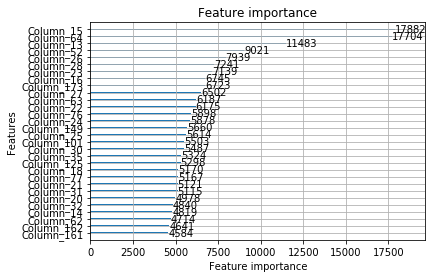

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [10]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10_1.model")
print('score: ', score)

[1]	valid_0's l2: 205.6	valid_0's l1: 10.0125
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 204.109	valid_0's l1: 9.97504
[3]	valid_0's l2: 202.633	valid_0's l1: 9.93784
[4]	valid_0's l2: 201.173	valid_0's l1: 9.90087
[5]	valid_0's l2: 199.726	valid_0's l1: 9.86409
[6]	valid_0's l2: 198.295	valid_0's l1: 9.82756
[7]	valid_0's l2: 196.877	valid_0's l1: 9.79127
[8]	valid_0's l2: 195.47	valid_0's l1: 9.75517
[9]	valid_0's l2: 194.079	valid_0's l1: 9.7193
[10]	valid_0's l2: 192.703	valid_0's l1: 9.6836
[11]	valid_0's l2: 191.341	valid_0's l1: 9.64813
[12]	valid_0's l2: 189.995	valid_0's l1: 9.61287
[13]	valid_0's l2: 188.66	valid_0's l1: 9.57786
[14]	valid_0's l2: 187.338	valid_0's l1: 9.54305
[15]	valid_0's l2: 186.025	valid_0's l1: 9.50845
[16]	valid_0's l2: 184.728	valid_0's l1: 9.47402
[17]	valid_0's l2: 183.45	valid_0's l1: 9.43984
[18]	valid_0's l2: 182.181	valid_0's l1: 9.4058
[19]	valid_0's l2: 180.923	valid_0's l1: 9.37206
[20]	valid_0's l2: 179.6

In [11]:
gbm = read_pkl("London/lightgbm_PM10_1.model")
# test_X = np.load("London/X_test.npy")
# test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.2923481770303318

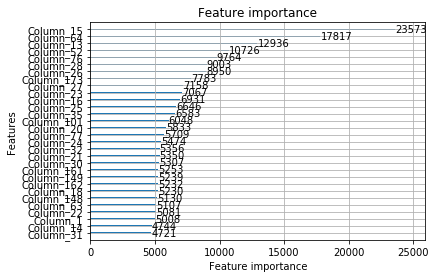

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [13]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.005, 'depth': 10, 'tree': 2000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10_2.model")
print('score: ', score)

[1]	valid_0's l2: 205.6	valid_0's l1: 10.0125
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 204.109	valid_0's l1: 9.97504
[3]	valid_0's l2: 202.633	valid_0's l1: 9.93784
[4]	valid_0's l2: 201.173	valid_0's l1: 9.90087
[5]	valid_0's l2: 199.726	valid_0's l1: 9.86409
[6]	valid_0's l2: 198.295	valid_0's l1: 9.82756
[7]	valid_0's l2: 196.877	valid_0's l1: 9.79127
[8]	valid_0's l2: 195.47	valid_0's l1: 9.75517
[9]	valid_0's l2: 194.079	valid_0's l1: 9.7193
[10]	valid_0's l2: 192.703	valid_0's l1: 9.6836
[11]	valid_0's l2: 191.341	valid_0's l1: 9.64813
[12]	valid_0's l2: 189.995	valid_0's l1: 9.61287
[13]	valid_0's l2: 188.66	valid_0's l1: 9.57786
[14]	valid_0's l2: 187.338	valid_0's l1: 9.54305
[15]	valid_0's l2: 186.025	valid_0's l1: 9.50845
[16]	valid_0's l2: 184.728	valid_0's l1: 9.47402
[17]	valid_0's l2: 183.45	valid_0's l1: 9.43984
[18]	valid_0's l2: 182.181	valid_0's l1: 9.4058
[19]	valid_0's l2: 180.923	valid_0's l1: 9.37206
[20]	valid_0's l2: 179.6

In [14]:
gbm = read_pkl("London/lightgbm_PM10_2.model")
# test_X = np.load("London/X_test.npy")
# test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3043216534074943

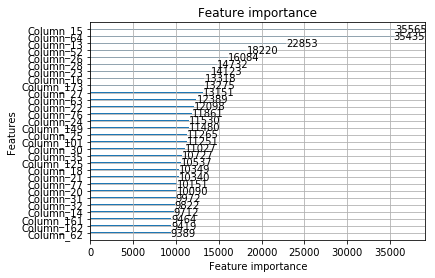

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [16]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
model_param = {'lr': 0.005, 'depth': 10, 'tree': 3000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10_3.model")
print('score: ', score)

[1]	valid_0's l2: 205.6	valid_0's l1: 10.0125
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 204.109	valid_0's l1: 9.97504
[3]	valid_0's l2: 202.633	valid_0's l1: 9.93784
[4]	valid_0's l2: 201.173	valid_0's l1: 9.90087
[5]	valid_0's l2: 199.726	valid_0's l1: 9.86409
[6]	valid_0's l2: 198.295	valid_0's l1: 9.82756
[7]	valid_0's l2: 196.877	valid_0's l1: 9.79127
[8]	valid_0's l2: 195.47	valid_0's l1: 9.75517
[9]	valid_0's l2: 194.079	valid_0's l1: 9.7193
[10]	valid_0's l2: 192.703	valid_0's l1: 9.6836
[11]	valid_0's l2: 191.341	valid_0's l1: 9.64813
[12]	valid_0's l2: 189.995	valid_0's l1: 9.61287
[13]	valid_0's l2: 188.66	valid_0's l1: 9.57786
[14]	valid_0's l2: 187.338	valid_0's l1: 9.54305
[15]	valid_0's l2: 186.025	valid_0's l1: 9.50845
[16]	valid_0's l2: 184.728	valid_0's l1: 9.47402
[17]	valid_0's l2: 183.45	valid_0's l1: 9.43984
[18]	valid_0's l2: 182.181	valid_0's l1: 9.4058
[19]	valid_0's l2: 180.923	valid_0's l1: 9.37206
[20]	valid_0's l2: 179.6

In [17]:
gbm = read_pkl("London/lightgbm_PM10_3.model")
# test_X = np.load("London/X_test.npy")
# test_Y = np.load("London/Y_PM10_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.3163125255178772

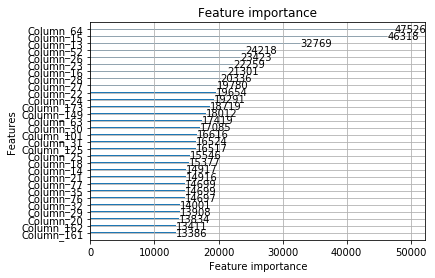

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()

In [ ]:
# NO2

In [6]:
# split the Y_NO2, X into training part and testing part

train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(4325068, 198) (1081268, 198) (4325068,) (1081268,)


In [7]:
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 600, 'sample': 0.8, 'seed': 3}

score = train_test(model_param, train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2, "London/lightgbm_NO2_1.model")
print('score: ', score)

[1]	valid_0's l2: 738.177	valid_0's l1: 21.1599
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 732.377	valid_0's l1: 21.0766
[3]	valid_0's l2: 726.634	valid_0's l1: 20.9938
[4]	valid_0's l2: 720.948	valid_0's l1: 20.9115
[5]	valid_0's l2: 715.319	valid_0's l1: 20.8296
[6]	valid_0's l2: 709.745	valid_0's l1: 20.7483
[7]	valid_0's l2: 704.222	valid_0's l1: 20.6674
[8]	valid_0's l2: 698.757	valid_0's l1: 20.5871
[9]	valid_0's l2: 693.343	valid_0's l1: 20.5072
[10]	valid_0's l2: 687.983	valid_0's l1: 20.4277
[11]	valid_0's l2: 682.683	valid_0's l1: 20.3488
[12]	valid_0's l2: 677.434	valid_0's l1: 20.2703
[13]	valid_0's l2: 672.232	valid_0's l1: 20.1923
[14]	valid_0's l2: 667.086	valid_0's l1: 20.1148
[15]	valid_0's l2: 661.986	valid_0's l1: 20.0378
[16]	valid_0's l2: 656.937	valid_0's l1: 19.9612
[17]	valid_0's l2: 651.934	valid_0's l1: 19.8851
[18]	valid_0's l2: 646.981	valid_0's l1: 19.8093
[19]	valid_0's l2: 642.078	valid_0's l1: 19.734
[20]	valid_0's l2

In [8]:
gbm = read_pkl("London/lightgbm_NO2_1.model")
test_X = np.load("London/X_test.npy")
test_Y = np.load("London/Y_NO2_test.npy")
test_predict = gbm.predict(test_X)
score = get_score(test_predict, test_Y)
score

0.2577989153349926

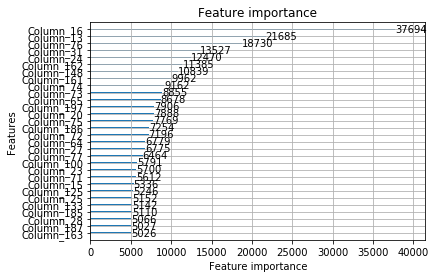

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, max_num_features=30)
plt.show()